Credit Card Fraud Detection using Classification and Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exploratory Data Analysis

In [3]:
data = pd.read_csv("creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


This dataset removed the names of the features to confidentiality reasons. Class is our variable of interest, or response variable that we are trying to predict

In [5]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
print(f"{data['Class'].value_counts()[1]/len(data)*100}% of transactions are fraudulent.")

0.1727485630620034% of transactions are fraudulent.


In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
data['Amount'].mean()


88.34961925093133

<Axes: xlabel='Class', ylabel='Amount'>

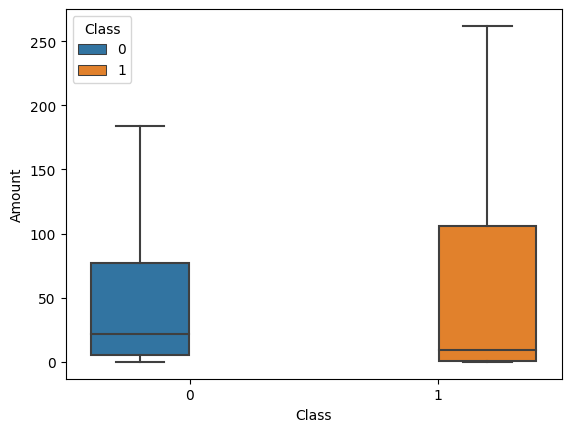

In [9]:
sns.boxplot(x="Class", y="Amount", hue="Class",data=data, showfliers =False)

Here we can see that fraudulent transactions seem to have more outliers. Let's explore this more

In [10]:
#Fraudulent Summary Stats
print(f"Fraudulent Mean: {data[data['Class'] == 1]['Amount'].mean()}")
print(f"Fraudulent Median: {data[data['Class'] == 1]['Amount'].median()}")
print(f"Fraudulent Min: {data[data['Class'] == 1]['Amount'].min()}")
print(f"Fraudulent Max: {data[data['Class'] == 1]['Amount'].max()}")
print(f"Fraudulent Standard Deviation: {data[data['Class'] == 1]['Amount'].std()}")
print("")
print(f"Non-Fraudulent Mean: {data[data['Class'] == 0]['Amount'].mean()}")
print(f"Non-Fraudulent Median: {data[data['Class'] == 0]['Amount'].median()}")
print(f"Non-Fraudulent Min: {data[data['Class'] == 0]['Amount'].min()}")
print(f"Non-Fraudulent Max: {data[data['Class'] == 0]['Amount'].max()}")
print(f"Non-Fraudulent Standard Deviation: {data[data['Class'] == 0]['Amount'].std()}")

Fraudulent Mean: 122.21132113821139
Fraudulent Median: 9.25
Fraudulent Min: 0.0
Fraudulent Max: 2125.87
Fraudulent Standard Deviation: 256.6832882977121

Non-Fraudulent Mean: 88.29102242231328
Non-Fraudulent Median: 22.0
Non-Fraudulent Min: 0.0
Non-Fraudulent Max: 25691.16
Non-Fraudulent Standard Deviation: 250.10509222589243


Text(0.5, 1.0, 'Non-Fraudulent Transactions')

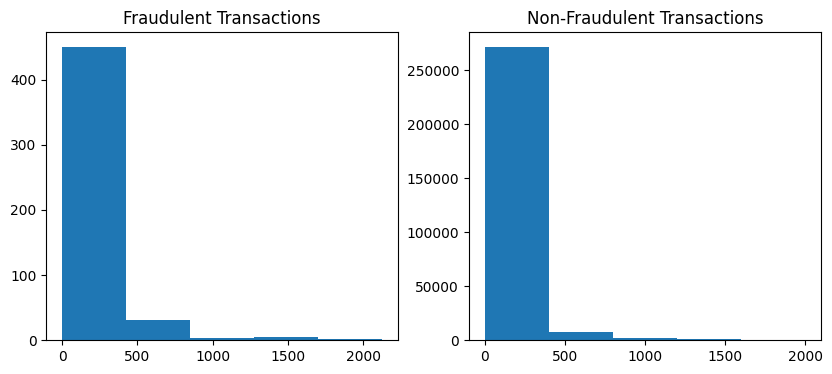

In [13]:
fraud_hist = data[data["Class"] == 1]['Amount']
#Showing amount under $2,500 to keep nonfraud on the same scale
nonfraud_hist = data[(data["Class"] == 0) & (data["Amount"] < 2000)]["Amount"]

fig, axs = plt.subplots(1,2, figsize =(10,4))

axs[0].hist(fraud_hist, bins =5)
axs[0].set_title("Fraudulent Transactions")

axs[1].hist(nonfraud_hist, bins =5)
axs[1].set_title("Non-Fraudulent Transactions")

Looking at our 5 number summary and histograms we can start to see that fraudulent transactions are much more right skewed as shown by mean > median. The two have similar stdev's but interesting the max fraudulent transaction was only $2,125. Let's explore the time feature to see if we can get more insight into what is typical of a fraudulent transaction.

<Axes: xlabel='Class', ylabel='Time'>

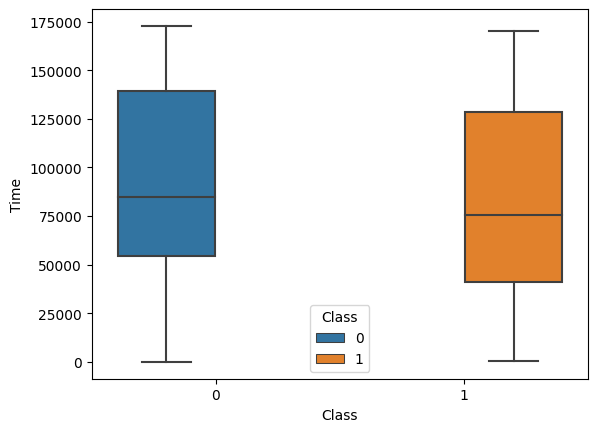

In [12]:
sns.boxplot(x = "Class", y = "Time", hue = "Class", data =data)